In [1]:
#installing the required packets
%%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade


In [2]:

!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from super_gradients.training import models

The console stream is logged into /root/sg_logs/console.log


[2023-05-05 09:02:53] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-05-05 09:03:00] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-05-05 09:03:00] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-05-05 09:03:00] WARNING - export.py - Failed to import pytorch_quantization
[2023-05-05 09:03:00] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [2]:
from torchinfo import summary

In [3]:
yolo_nas_l=models.get("yolo_nas_l",pretrained_weights="coco")

[2023-05-05 09:03:10] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


In [4]:
summary(model=yolo_nas_l, 
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

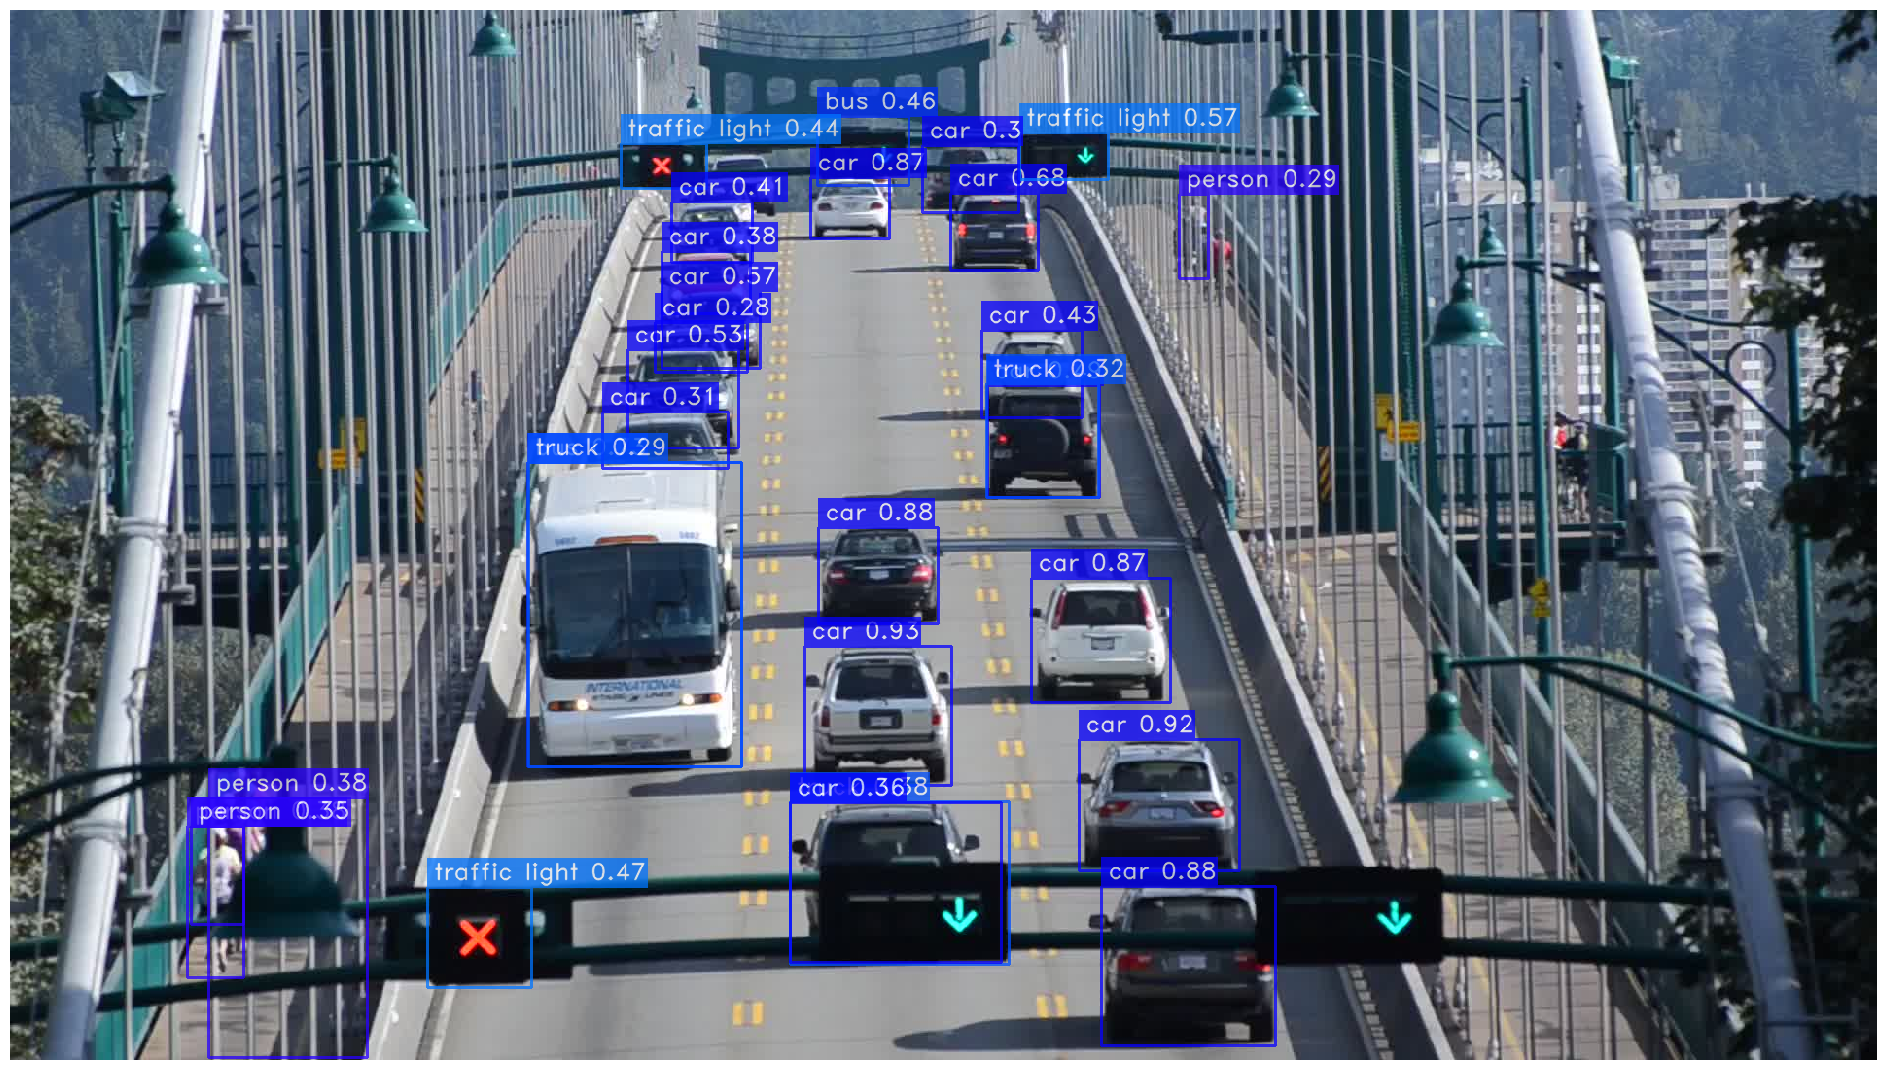

In [ ]:
# url = "/content/ezgif-frame-001_OZzxdny.jpg"
# yolo_nas_l.predict(url, conf=0.25).show()

In [5]:
input_video_path = f"/content/drive/MyDrive/ronakvideo - Made with Clipchamp_1683277200439.mp4"
output_video_path = "/content/pugatedetection.mp4"

In [6]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [7]:
yolo_nas_l.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|██████████| 1492/1492 [01:05<00:00, 22.93it/s]


In [8]:
from IPython.display import HTML
from base64 import b64encode

video_file = open( "/content/pugatedetection.mp4", "rb")
video_bytes = video_file.read()

base64_video = b64encode(video_bytes).decode('utf-8')
HTML(f'<video controls><source src="data:video/mp4;base64,{base64_video}" type="video/mp4"></video>')


Mounted at /content/drive
